# Step 1. Big Picture & Set Up

In [ ]:
# Python ≥3.5 is required
#import sys #
# Scikit-Learn ≥0.20 is required
import sklearn # general ml package

# Implementing common imports for the functionality to be used.
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently.

# I will use 42
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)


# Step 2. Get the Data


To load the data in, I used pandas and Colab's functionality for handling files. I used the file housing.csv obtained from Kaggle, which was edited to ensure columns were appropriately formatted and given names corresponding with the numbers, as defined on Kaggle.

In [ ]:
import pandas as pd
from google.colab import files
import io

def load_housing_data():
  uploaded=files.upload()
  return pd.read_csv(io.BytesIO(uploaded['housing.csv']))
# Dataset is now stored in a Pandas Dataframe

housing = load_housing_data()
housing.head(10)

Saving housing.csv to housing (3).csv


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


After uploading the file, we can run some functions that give us useful information about the data, such as describe, which gives us some basic statistics for the data.

We can also summarize our data with the info function. For example, it gives us the name of features, count, and type.


In [ ]:
#Summary of data info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
#basic statistics about data
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Now, we can look at more detailed information about the data for each column. We begin by displaying histograms for each column.

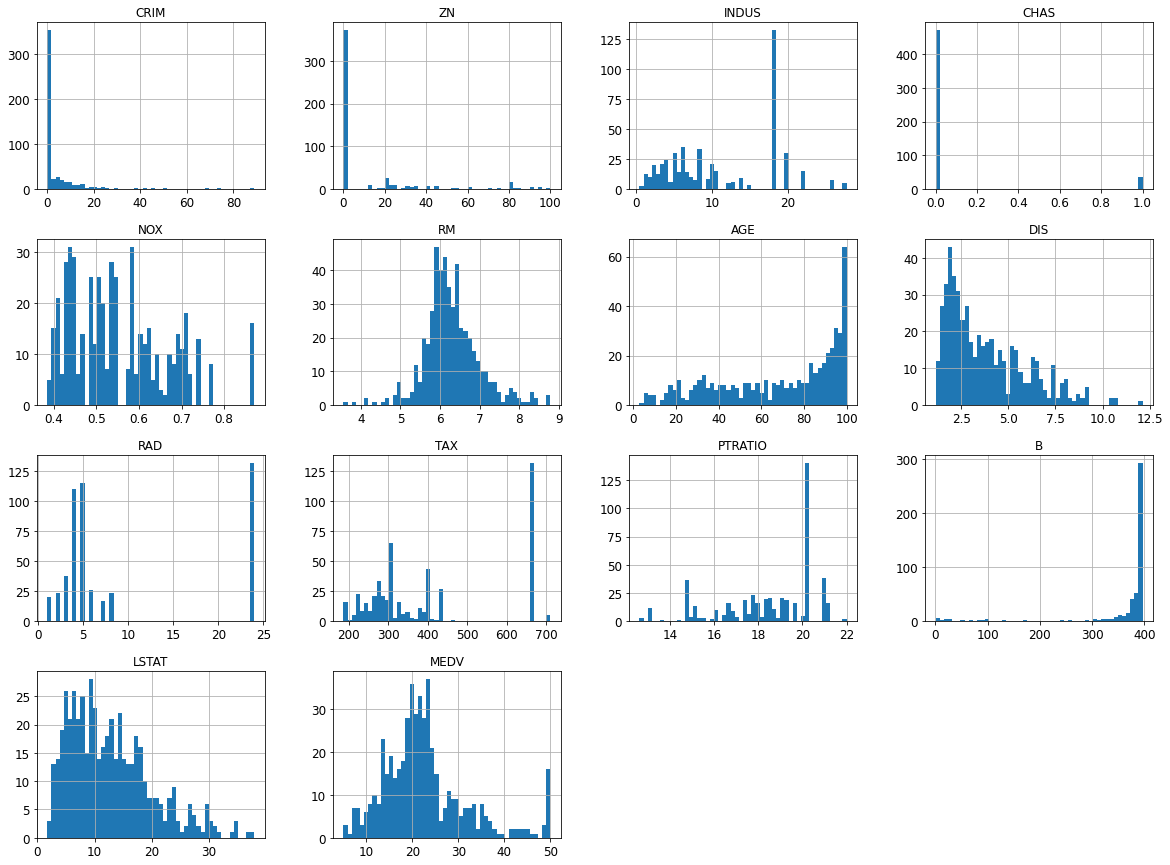

In [ ]:
# These histograms show the distributions of the different values for each category. The bins represent the values, the height represent how many values there are in that bin for that category
#- CRIM per capita crime rate by town - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
#- INDUS proportion of non-retail business acres per town - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#- NOX nitric oxides concentration (parts per 10 million) - RM average number of rooms per dwelling - AGE proportion of owner-occupied units built prior to 1940
#- DIS weighted distances to five Boston employment centres - RAD index of accessibility to radial highways - TAX full-value property-tax rate per $10,000
#- PTRATIO pupil-teacher ratio by town - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town - LSTAT % lower status of the population
#- MEDV Median value of owner-occupied homes in $1000's

%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()
#save_fig("attribute_histogram_plots")

We can summarize these results. I will focus on ones I found particularly compelling:

For CRIM, majority of the data points are < 20. In fact, even more are in the bin next to zero. So we can include there is generally a very low crime rate per capita in Boston suburbs and towns.

For AGE, the proportion of owner-occupied units built prior to 1940, we see an interesting division. Less than half of many suburbs and towns' housing units were built prior to 1940, but there are also many suburbs and towns that have housing units which are >50% or even nearly all built prior to 1940.

For RM, we see that it is common for housing units in various suburbs and towns to have between 5 and 7 rooms.

For ZN, the proportion of residential land zoned for lots over 25,000 sq.ft., we do see some variation of this value, but again, most suburbs and towns have a near-zero proportion.

The DIS category shows us that it is more common for suburbs and towns to have housing units closer to five Boston employment centers rather than farther away.

For MEDV, we see that housing units in Boston are valued below \$50K, with a larger portion between around \$12K and \$25K.



In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
print( train_set.shape )
print( test_set.shape ) # No peeking at the test data though (data snooping bias)

(404, 14)
(102, 14)


We can look a bit closer at the MEDV column's histogram. We see it results in a nice bell shape, so we will not need to transform this data for further clarity.

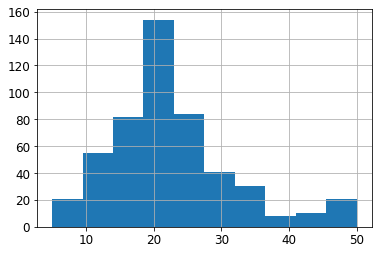

In [ ]:
housing["MEDV"].hist()

#Results in nice bell shape.

In [ ]:
housing["MEDV"].value_counts()

# value counts returns an object containing counts of unique values.

50.0    16
25.0     8
23.1     7
21.7     7
22.0     7
        ..
12.8     1
29.9     1
9.6      1
36.1     1
13.0     1
Name: MEDV, Length: 229, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd12c6dc748>,
      dtype=object)

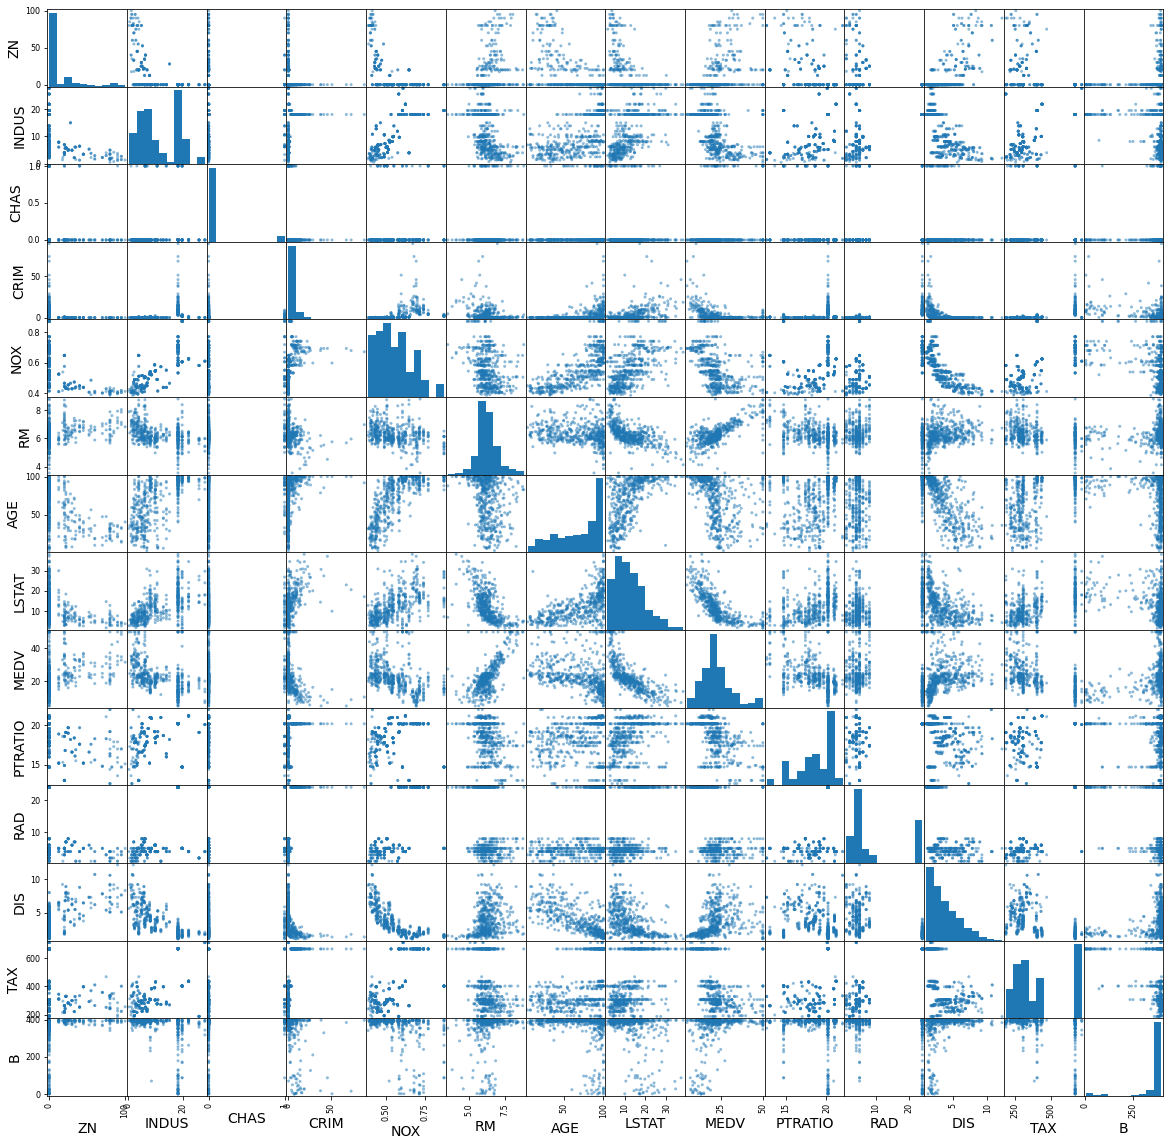

In [ ]:
#Some scatter matrices
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["ZN", "INDUS","CHAS", "CRIM", "NOX", "RM", "AGE", "LSTAT", "MEDV", "PTRATIO", "RAD", "DIS", "TAX", "B"]
scatter_matrix(housing[attributes], figsize=(20, 20))
# save_fig("scatter_matrix_plot")

We can learn about how the different columns correlate to MEDV.

In [ ]:
# Using corr() to see the correlations (aka Standard Correlation Coefficient or Pearson's r) among the features of the dataset

# dataframe.corr() finds the pairwise correlation of all columns in a dataframe.
corr_matrix = housing.corr()
corr_matrix.shape

(14, 14)

In [ ]:
# Checking how much each feature correlates to the median-value of owner-occupied housing units
corr_matrix["MEDV"].sort_values(ascending=False)

#Correlation coefficients show how strong the relationship is between data.
# 1 indicates the strongest positive relationship. 0 indicates no relationship. -1 indicates the strongest negative relationship

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

We see that RM has a strong positive relation, while LSTAT, PTRATIO, INDUS, and TAX, have a strong negative correlation. CHAS has hardly any relationship with MEDV at all. The other relations are not quite strong in either a negative or positive way.

# Step 3. Discover and visualize the data to gain insights

We can do further visualization of the data to learn more. We'll focus particularly on scatter plots comparing different columns to MEDV.

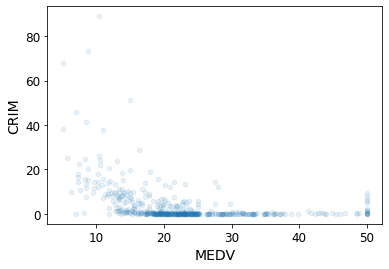

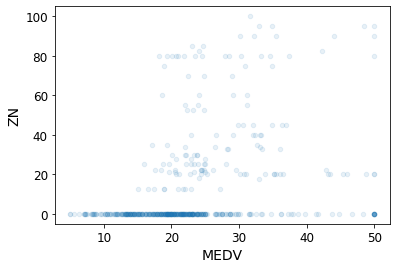

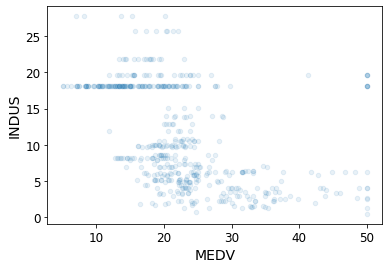

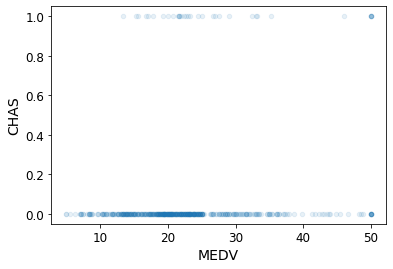

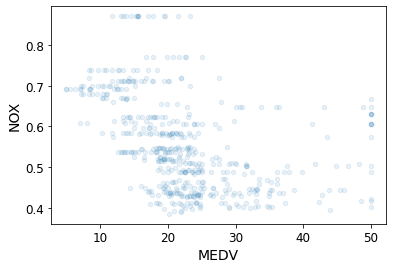

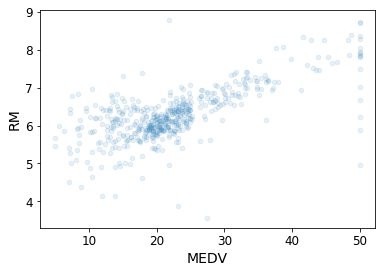

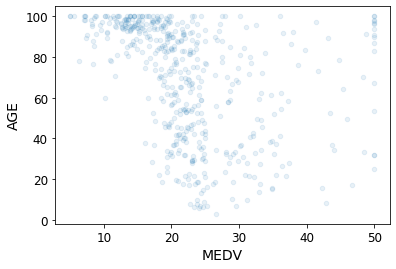

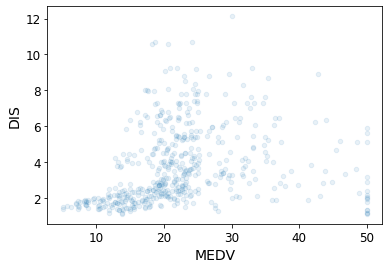

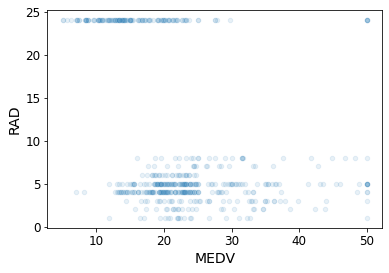

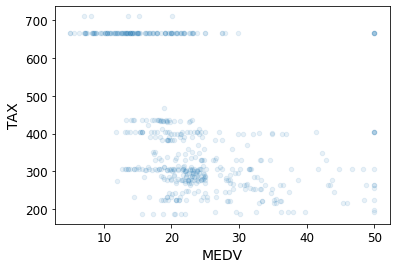

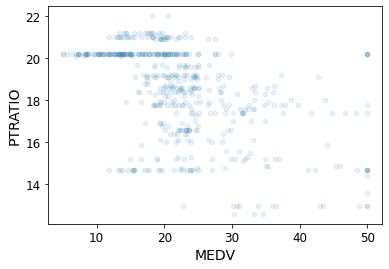

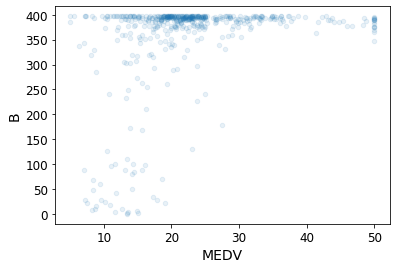

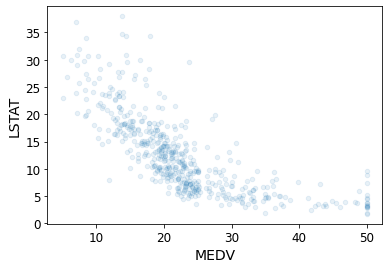

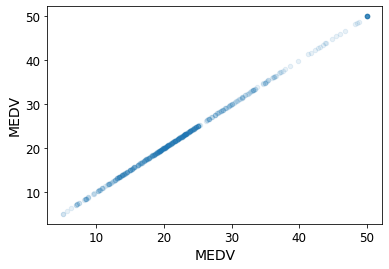

In [ ]:
#Some scatter plots for reference
housing.plot(kind="scatter",x="MEDV", y="CRIM",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="ZN",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="INDUS",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="CHAS",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="NOX",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="RM",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="AGE",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="DIS",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="RAD",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="TAX",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="PTRATIO",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="B",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="LSTAT",alpha=0.1)
housing.plot(kind="scatter",x="MEDV", y="MEDV",alpha=0.1)








Those plots allow us to see what variables have a positive or negative relationship with MEDV, how strong that relationship is, and/or if there is a relationship at all. In general, it is informative of the trends that exist for each.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd11dc25518>,
      dtype=object)

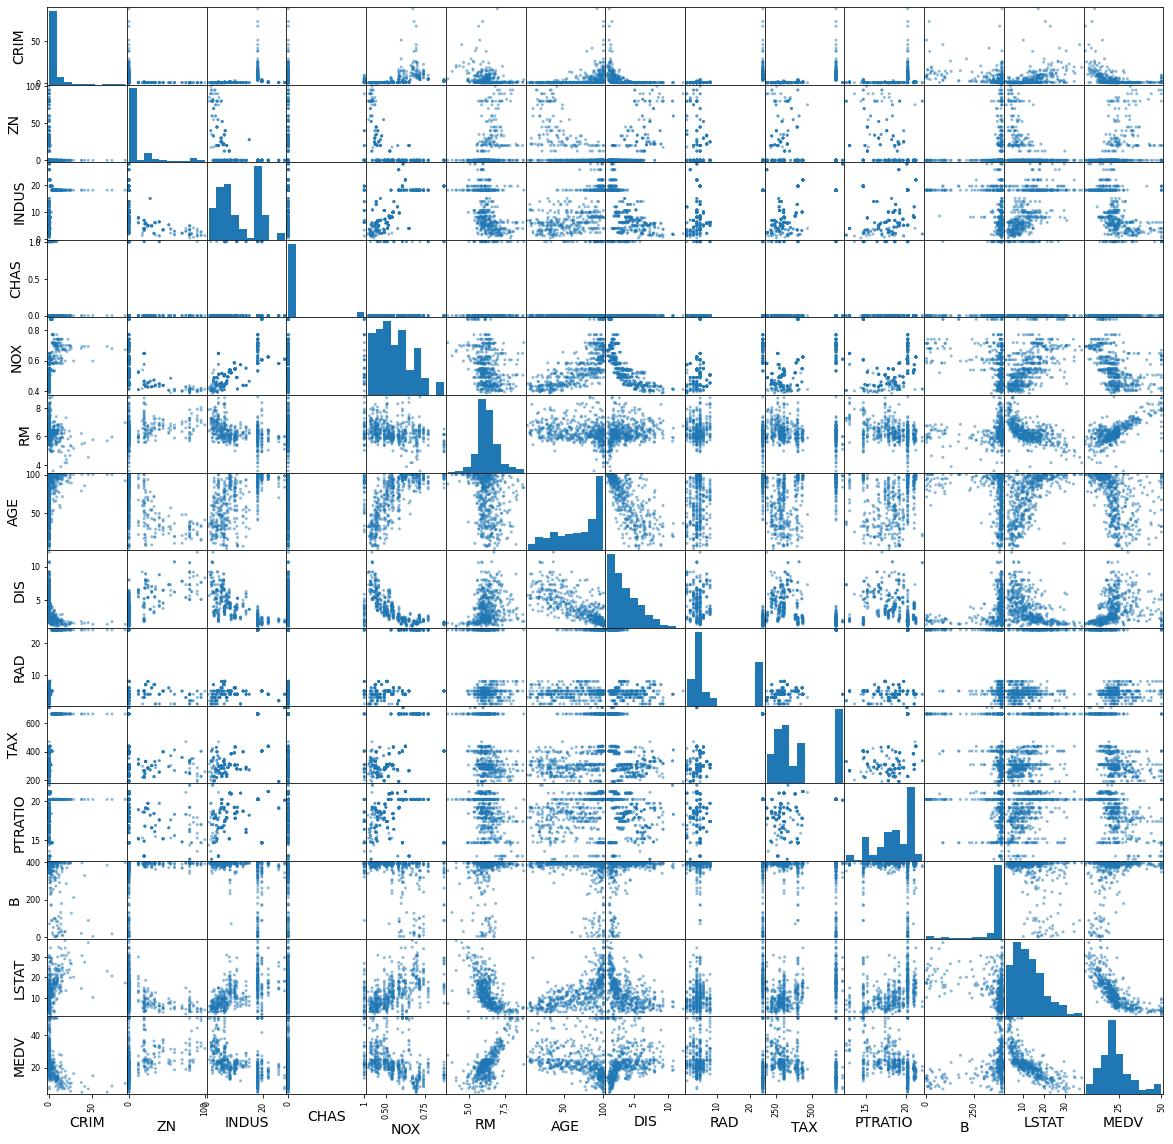

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

#Referenced example code from class for this. Updated the attribute with the different columns from the csv.
attributes = ["CRIM",	"ZN",	"INDUS",	"CHAS",	"NOX",	"RM",	"AGE",	"DIS",	"RAD",	"TAX",	"PTRATIO",	"B",	"LSTAT",	"MEDV"]
scatter_matrix(housing[attributes], figsize=(20, 20))
# save_fig("scatter_matrix_plot")



The previous plot is a lot to view at once. We can focus on a few specific categories instead. Let's break down this representation further, with our focus on comparing categories to each other and MEDV.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd11e3a49e8>,
      dtype=object)

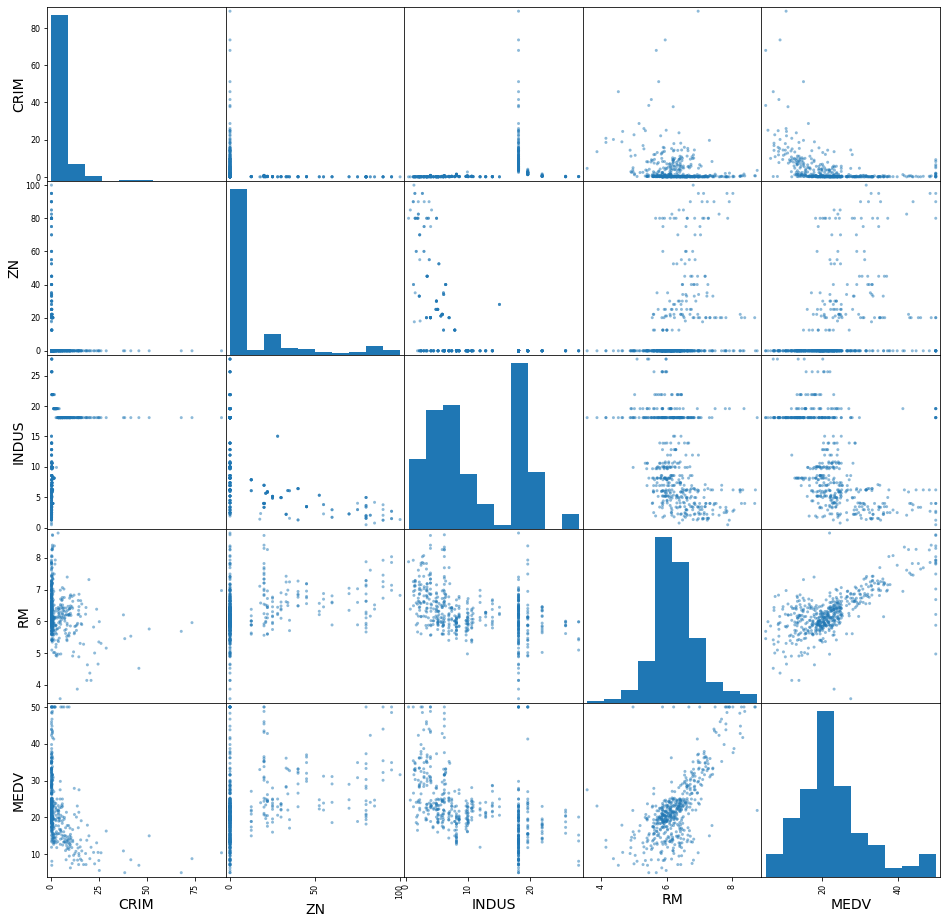

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

#Referenced example code from class for this. Updated the attribute with the different columns from the csv.
attributes = ["CRIM",	"ZN",	"INDUS","RM",	"MEDV"]
scatter_matrix(housing[attributes], figsize=(16, 16))
# save_fig("scatter_matrix_plot")



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd11b19ecc0>,
      dtype=object)

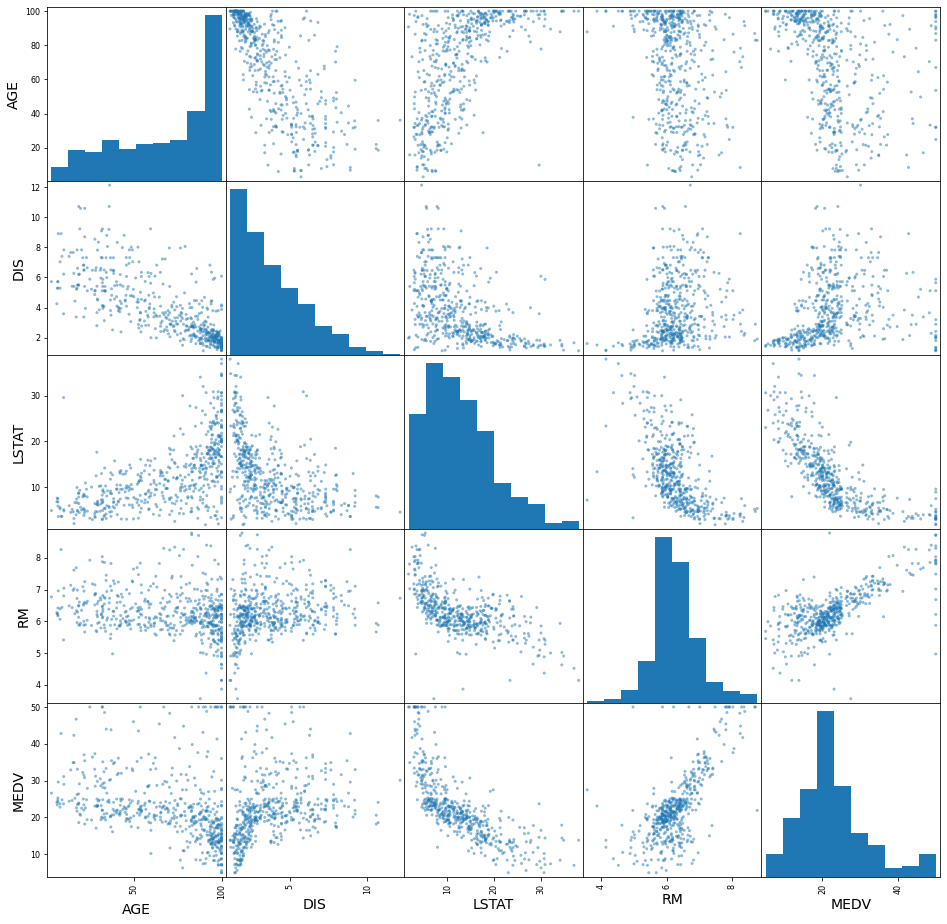

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

#Referenced example code from class for this. Updated the attribute with the different columns from the csv.
attributes = ["AGE",	"DIS",	"LSTAT","RM",	"MEDV"]
scatter_matrix(housing[attributes], figsize=(16, 16))
# save_fig("scatter_matrix_plot")


The latter highlights several clear positive or negative relationships.

# Step 4. Prepare the data for Machine Learning algorithms (aka Data Cleaning)

Our goal will be to predict the median value of owner-occupied homes. We will consider MEDV the label, and we will ensure our training data does not include MEDV.

In [ ]:
housing_labels = housing["MEDV"].copy()
housing = housing.drop(["MEDV"], axis=1)

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


We see there are no null values in the data.

Now we can build a pipeline for preprocessing the data.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

housing_num_tr = num_pipeline.fit_transform(housing)
housing_num_tr

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [ ]:
from sklearn.compose import ColumnTransformer
housing_prepared = num_pipeline.fit_transform(housing)

In [ ]:
# housing_prepared
print(housing.shape)
print(housing_prepared.shape)

(506, 14)
(506, 14)


In [ ]:
housing_prepared

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

# Step 5. Select and train a model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# using the num preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = num_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


In [ ]:
print("Labels:", list(some_labels))

Labels: [24.0, 21.6, 34.7, 33.4, 36.2]


We see our prediction versus the actual values are not fully accurate, but they are not too drastically far apart...

In [ ]:
some_data_prepared

array([[-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
         0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
        -1.45900038,  0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         0.19427445,  0.36716642,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, -0.27259857, -0.74026221,
         1.28271368, -0.26581176,  0.55715988, -0.8678825 , -0.98732948,
        -0.30309415,  0.39642699, -1.2087274 ],
       [-0.41675042, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.01630251, -0.80988851,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.41616284, -1.36151682],
       [-0.41248185, -0.48772236, -1.30687771, -0.27259857, -0.83528384,
         1.22857665, -0.51117971,  1.07773662, -0.75292215, -1.10611514,
         0.1130321 ,  0.44105193, -1.02650148]])

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.679191295697282

This is not too large of an error, though it could certainly be smaller.

Considering the example code in shown in class, we said a mean squared error of ~68000 was too large for values that are supposed to be between ~120000 and ~265000.

Our labels range from 21.6 to 36.2. ~4.68 is again, a decently large error. We could improve this model.

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

3.2708628109003155

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The Decision Tree Regressor model seems perfect with the error of 0.0, but it is more reasonable to assume that we've used badly overfit data. We can try another model, the K-fold Validation Feature of SciKit-Learn's. Then, we'll compute the same scores for the Linear Regression model.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.16449566 0.2057983  0.08744746 0.4115966  0.29967302 0.41844718
 0.1183216  0.51633323 0.42895221 0.09591663]
Mean: 0.274698189811576
Standard deviation: 0.1518491337354422


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [8.73072840e-15 7.93616121e-14 1.66507038e-14 6.49110569e-15
 2.58114646e-14 9.07555731e-14 2.57614616e-14 4.54287417e-14
 8.67418890e-15 4.13086044e-14]
Mean: 3.489741842648408e-14
Standard deviation: 2.8155718653926435e-14


Try the Random Forest Regressor model now.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.06805586521758368

This is a much better value.

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.08743121 0.12743195 0.06186354 0.35564804 0.38183022 0.24008254
 0.04147361 0.52641404 0.17654178 0.06497092]
Mean: 0.20636878407386203
Standard deviation: 0.1568339745951957


In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     3.489742e-14
std      2.967873e-14
min      6.491106e-15
25%      1.071072e-14
50%      2.578646e-14
75%      4.439871e-14
max      9.075557e-14
dtype: float64

# Fine Tune Your Model

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

The following is the best hyperparameter pair found.

In [ ]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 3}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

During the grid search, we've tested multiple hyperparameter combinations. We can view each of their scores.

In [ ]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.715798200663869 {'max_features': 2, 'n_estimators': 3}
3.7807193916790154 {'max_features': 2, 'n_estimators': 10}
3.8746946363260744 {'max_features': 2, 'n_estimators': 30}
3.113657821855382 {'max_features': 4, 'n_estimators': 3}
2.856069994661365 {'max_features': 4, 'n_estimators': 10}
2.482947073952358 {'max_features': 4, 'n_estimators': 30}
2.030648199002666 {'max_features': 6, 'n_estimators': 3}
2.0750187378841605 {'max_features': 6, 'n_estimators': 10}
1.8527115039726187 {'max_features': 6, 'n_estimators': 30}
1.1246444536921898 {'max_features': 8, 'n_estimators': 3}
1.2743744225694593 {'max_features': 8, 'n_estimators': 10}
1.4172658312469515 {'max_features': 8, 'n_estimators': 30}
3.917932385864046 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.5509403587735298 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.416665512892558 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.0846490889469695 {'bootstrap': False, 'max_features': 3, 'n_estima

We can put the results found in a table now.

In [ ]:

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007858,0.002292,0.001165,0.000114,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-5.152124,-10.461584,-15.825952,-46.811705,-32.942398,-22.238753,15.428393,18,-4.870330e+00,-2.795095e+00,-3.816861e+00,-3.018787e+00,-1.599986e+00,-3.220212e+00,1.088605e+00
1,0.019129,0.002486,0.001512,0.000051,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.363645,-10.791340,-11.459321,-26.496950,-19.357940,-14.293839,7.928836,15,-2.223705e+00,-1.619667e+00,-2.053222e+00,-1.307831e+00,-1.380444e+00,-1.716974e+00,3.633066e-01
2,0.048820,0.001644,0.003168,0.000687,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3.461301,-6.304752,-10.357126,-28.397338,-26.545777,-15.013259,10.422072,16,-9.889521e-01,-8.180866e-01,-9.921536e-01,-6.797583e-01,-9.912102e-01,-8.940322e-01,1.263030e-01
3,0.006502,0.000042,0.001002,0.000035,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-4.858715,-5.028493,-11.232882,-16.895941,-10.458295,-9.694865,4.471402,12,-2.381559e+00,-1.421602e+00,-1.481602e+00,-2.068892e+00,-1.169712e+00,-1.704673e+00,4.487546e-01
4,0.018821,0.000217,0.001459,0.000019,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.358714,-6.379045,-7.742874,-16.740282,-7.564764,-8.157136,4.711183,10,-9.479265e-01,-1.049364e+00,-7.588494e-01,-6.930094e-01,-7.753077e-01,-8.448913e-01,1.324677e-01
5,0.054808,0.000577,0.002755,0.000035,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.251683,-2.881086,-4.117988,-15.816042,-6.758331,-6.165026,5.149945,9,-5.052455e-01,-4.975372e-01,-5.050146e-01,-2.965807e-01,-3.103920e-01,-4.229540e-01,9.768202e-02
6,0.007244,0.000430,0.001068,0.000150,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-2.074063,-2.938845,-4.221353,-9.080319,-2.303080,-4.123532,2.588326,5,-1.089420e+00,-6.632510e-01,-3.640658e-01,-7.788999e-01,-4.355693e-01,-6.662411e-01,2.593455e-01
7,0.021302,0.000261,0.001502,0.000039,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.907105,-1.380733,-2.964974,-12.969149,-3.306553,-4.305703,4.426219,6,-8.299866e-01,-5.839212e-01,-2.927084e-01,-3.549180e-01,-3.113316e-01,-4.745732e-01,2.060659e-01
8,0.064638,0.003787,0.003163,0.000742,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.520875,-1.194603,-1.802415,-11.152856,-2.491950,-3.432540,3.914880,4,-2.857609e-01,-2.672022e-01,-2.086177e-01,-1.599258e-01,-1.811993e-01,-2.205412e-01,4.856963e-02
9,0.007826,0.000126,0.001080,0.000122,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.735523,-0.547800,-2.251243,-1.198691,-1.590869,-1.264825,0.612860,1,-2.300468e-01,-4.399698e-01,-1.889053e-01,-3.501509e-01,-3.395912e-01,-3.097328e-01,8.992882e-02


We can check out a different method, too, which is the Randomized Search CV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1.5263455327264075 {'max_features': 7, 'n_estimators': 180}
2.523209369030593 {'max_features': 5, 'n_estimators': 15}
2.7261748715420286 {'max_features': 3, 'n_estimators': 72}
2.336447650149997 {'max_features': 5, 'n_estimators': 21}
1.5840831743912502 {'max_features': 7, 'n_estimators': 122}
2.713742807303925 {'max_features': 3, 'n_estimators': 75}
2.777216649031549 {'max_features': 3, 'n_estimators': 88}
2.0234645730510175 {'max_features': 5, 'n_estimators': 100}
2.8156401944558813 {'max_features': 3, 'n_estimators': 150}
2.343524030716792 {'max_features': 5, 'n_estimators': 2}


The following code will inform us on the relative importance of each attribute for making accurate predictions.

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([4.38725605e-03, 1.52094074e-05, 1.45823179e-03, 7.91227339e-05,
       1.93532646e-03, 6.51343293e-02, 2.00130955e-03, 8.48602332e-04,
       8.91932513e-04, 6.37819033e-04, 4.71389342e-03, 1.87767562e-03,
       4.00973280e-02, 8.75921964e-01])

In [ ]:
num_attribs = list(housing)
sorted(zip(feature_importances, num_attribs), reverse=True)

[(0.8759219637773791, 'MEDV'),
 (0.06513432925599218, 'RM'),
 (0.04009732804395449, 'LSTAT'),
 (0.004713893423392155, 'PTRATIO'),
 (0.0043872560539125315, 'CRIM'),
 (0.002001309554621382, 'AGE'),
 (0.001935326461300493, 'NOX'),
 (0.0018776756204975497, 'B'),
 (0.0014582317886438708, 'INDUS'),
 (0.0008919325133133451, 'RAD'),
 (0.0008486023322066767, 'DIS'),
 (0.0006378190334434274, 'TAX'),
 (7.91227339424422e-05, 'CHAS'),
 (1.5209407400382225e-05, 'ZN')]

The following code is for evaluating the final model of the test set.

In [ ]:
final_model = grid_search.best_estimator_

X_test = housing
y_test = housing_labels

X_test_prepared = num_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

0.538063673247914

We see our error values are much lower now that we've determined a good model to use for this task and tweaked it.

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

0.24281949934123867

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.41528057, 0.63762613])

# Step 7. Present Your Solution.

For this project, I began by organizing the data and generating various plots based on that data to learn more about each of the columns available. Histograms allowed me to determine the trends for each category. Scatter plots were insightful in that they allowed me to visualize the relationships between various categories of data, especially those between each category and the "MEDV", the median value of owner-occupied homes in the $1,000's, category. I have previously noted which relationships I found to be strongest in either the positive or negative direction.

The data was broken up into separate parts, one for all components other than the MEDV column, and the MEDV column which was used as labels. A pipeline was constructed to carry-out any essential pre-processing of the data. This allowed us to ultimately carry out the predictive modelling.

Later, several models were tested out and error measurements were analyzed. The Random Forest Regressor model was ultimately used and fine-tuned.



# Step 8. Launch, Maintain, and Update

In order to keep this maintained and up-to-date, I would ensure that new packages are installed as needed and old ones removed when they become outdated. I would modify the code to ensure it runs smoothly with those new changes, paying particular attention to syntax differences or to whether there are any new parameters necessary when implementing certain functions. Regarding smoothness, to elaborate, I would ensure that all of the code works well together even after small changes to small sections, as many variables in this program are used again and again.

Some of the things included in this assignment are exploratory, such as the several models presented towards the end, meant for testing and deciding which model is best. I think keeping this code could be beneficial for future purposes for other programmer's to reference or if there is ever a reason we need to change the model being used.

If new data relevant to the median housing prices in Boston, MA becomes available, or if people wanted to use this model for prices in other counties/cities, this model should still work as is, with aforementioned potential changes made. Some changes that might need to be added as well given a new CSV are handling null values as well as handling categorical variables instead of numerical ones. However, for the data used in this case, this was not necessary. Additional plots and mappings may give increased insights as well about factors related to particular locations, etc.